In [173]:
!pwd

/global/u2/h/huikong/obiwan_codes/obiwan_Aug/obiwan_code/py/ipynb


In [2]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import astropy.io.fits as fits
from astropy.table import Table

Populating the interactive namespace from numpy and matplotlib


In [4]:
topdir = '/global/cscratch1/sd/adematti/Obiwan/dr9/ebv1000/north/merged/'
obiwan = fits.getdata(topdir+'merged_tractor.fits')

sim = fits.getdata(topdir+'matched_input.fits')

random = fits.getdata(topdir+'merged_randoms.fits')

/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in less
  app.launch_new_instance()
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in greater
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in less
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in greater
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/con

Text(0.5,0,'delta flux z, input-output')

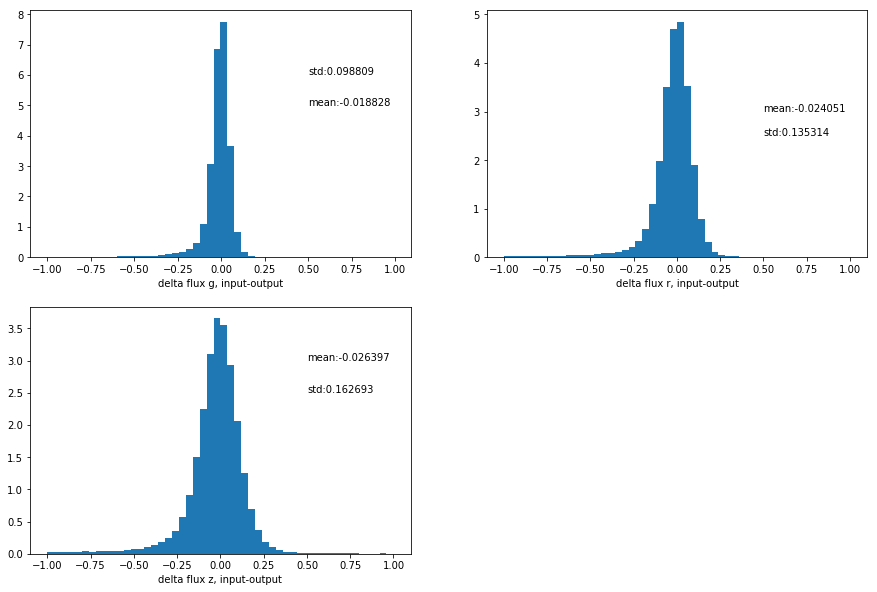

In [30]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sel = ((sim['input_flux_g']-sim['flux_g'])>-1)&((sim['input_flux_g']-sim['flux_g'])<1)
delta_fluxg = sim['input_flux_g'][sel]-sim['flux_g'][sel]
p=plt.hist(delta_fluxg,bins=50,density=True)
plt.text(0.5,5,'mean:%f'%delta_fluxg.mean())
plt.text(0.5,6,'std:%f'%delta_fluxg.std())
plt.xlabel('delta flux g, input-output')

plt.subplot(2,2,2)
sel = ((sim['input_flux_r']-sim['flux_r'])>-1)&((sim['input_flux_r']-sim['flux_r'])<1)
delta_fluxg = sim['input_flux_r'][sel]-sim['flux_r'][sel]
p=plt.hist(delta_fluxg,bins=50,density=True)
plt.text(0.5,3,'mean:%f'%delta_fluxg.mean())
plt.text(0.5,2.5,'std:%f'%delta_fluxg.std())
plt.xlabel('delta flux r, input-output')

plt.subplot(2,2,3)
sel = ((sim['input_flux_z']-sim['flux_z'])>-1)&((sim['input_flux_z']-sim['flux_z'])<1)
delta_fluxg = sim['input_flux_z'][sel]-sim['flux_z'][sel]
p=plt.hist(delta_fluxg,bins=50,density=True)
plt.text(0.5,3,'mean:%f'%delta_fluxg.mean())
plt.text(0.5,2.5,'std:%f'%delta_fluxg.std())
plt.xlabel('delta flux z, input-output')

In [54]:
# Libraries
from scipy.stats import kde
 
def plot_maker(x_col,y_col,x_label=None,y_label=None,y_lim=None,x_lim=None,color='red'):
    import numpy as n
    x, y = x_col,y_col
    nbins = 30
    # Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
    k = kde.gaussian_kde(np.array([x,y]))
    xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
    # contour
    import matplotlib.colors as mcolors
    if x_label is not None:
        plt.xlabel(x_label)
        plt.ylabel(y_label)
    if y_lim is not None:
        plt.gca().set_ylim(y_lim)
    if x_lim is not None:
        plt.gca().set_xlim(x_lim)
    if color=='red':
        colors = [(1,0,0,i) for i in np.linspace(0.2,1,9)]
        colors[0] = (0, 0, 1, 0.0)
    if color=='blue':
        colors = [(0,0,1,i) for i in np.linspace(0.2,1,9)]
        colors[0] = (0, 0, 1, 0.0)

    plt.contourf(xi, yi, zi.reshape(xi.shape),8,colors=colors)


/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in greater
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in less
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:15: RuntimeWarning: divide by zero encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:16: RuntimeWarning: divide by zero encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:16: 

'\nobiwan vs real ELGs this plot can be used sometime later\n'

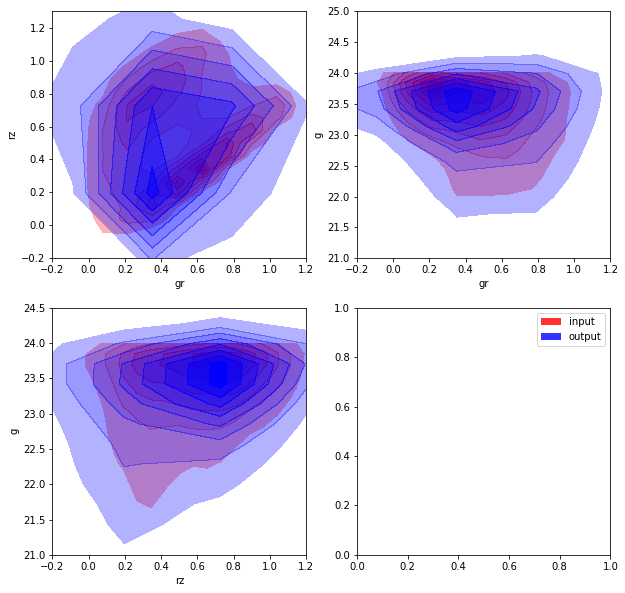

In [70]:
plt.figure(figsize = (10,10))  

deltaz = sim['input_flux_z']-sim['flux_z']
deltag = sim['input_flux_g']-sim['flux_g']
deltar = sim['input_flux_r']-sim['flux_r']

sel = (deltaz>-1)&(deltaz<1)&(deltag>-1)&(deltag<1)&(deltar>-1)&(deltar<1)
input_g = 22.5 - 2.5 * np.log10(sim['input_flux_g'][sel] / sim['mw_transmission_g'][sel])
input_r = 22.5 - 2.5 * np.log10(sim['input_flux_r'][sel] / sim['mw_transmission_r'][sel])
input_z = 22.5 - 2.5 * np.log10(sim['input_flux_z'][sel] / sim['mw_transmission_z'][sel])

input_gr = input_g - input_r
input_rz = input_r - input_z

output_g = 22.5 - 2.5 * np.log10(sim['flux_g'][sel] / sim['mw_transmission_g'][sel])
output_r = 22.5 - 2.5 * np.log10(sim['flux_r'][sel] / sim['mw_transmission_r'][sel])
output_z = 22.5 - 2.5 * np.log10(sim['flux_z'][sel] / sim['mw_transmission_z'][sel])

output_gr = output_g - output_r
output_rz = output_r - output_z

plt.subplot(2,2,1) 
sel0 = (output_gr>-10)&(output_gr<10)&(output_rz>-10)&(output_rz<10)
plot_maker(input_gr[sel0],input_rz[sel0],x_label='gr',y_label='rz',y_lim=(-0.2,1.3),x_lim=(-0.2,1.2),color='red')
plot_maker(output_gr[sel0],output_rz[sel0],y_lim=(-0.2,1.3),x_lim=(-0.2,1.2),color='blue')

plt.subplot(2,2,2)
sel0 = (output_gr>-10)&(output_gr<10)&(output_g>10)&(output_g<30)
plot_maker(input_gr[sel0],input_g[sel0],x_label='gr',y_label='g',color='red',y_lim=(21,25),x_lim=(-0.2,1.2))
plot_maker(output_gr[sel0],output_g[sel0],color='blue')

plt.subplot(2,2,3)
sel0 = (output_rz>-10)&(output_rz<10)&(output_g>10)&(output_g<30)
plot_maker(input_rz[sel0],input_g[sel0],x_label='rz',y_label='g',color='red',x_lim=(-0.2,1.2),y_lim=(21,24.5))
plot_maker(output_rz[sel0],output_g[sel0],x_label='rz',y_label='g',color='blue',x_lim=(-0.2,1.2),y_lim=(21,24.5))


plt.subplot(2,2,4)

proxy = [plt.Rectangle((0,0),1,1,fc = [ 1, 0, 0, 0.8]), plt.Rectangle((0,0),1,1,fc = [ 0, 0, 1, 0.8])]
plt.legend(proxy, ["input","output"])
'''
obiwan vs real ELGs this plot can be used sometime later
'''

In [125]:

elg_ture = cuts.isELG(gflux=sim['input_flux_g'],rflux=sim['input_flux_r'],zflux=sim['input_flux_z'],south=True)
elg_out = cuts.isELG(gflux=sim['flux_g'],rflux=sim['flux_r'],zflux=sim['flux_z'],south=True)

/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/code/desitarget/0.21.1/lib/python3.6/site-packages/desitarget-0.21.1-py3.6.egg/desitarget/cuts.py:579: RuntimeWarning: invalid value encountered in less
  elg &= gflux < 10**((22.5-21.0)/2.5)                       # g>21
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/code/desitarget/0.21.1/lib/python3.6/site-packages/desitarget-0.21.1-py3.6.egg/desitarget/cuts.py:580: RuntimeWarning: invalid value encountered in greater
  elg &= rflux > 10**((22.5-23.4)/2.5)                       # r<23.4
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/code/desitarget/0.21.1/lib/python3.6/site-packages/desitarget-0.21.1-py3.6.egg/desitarget/cuts.py:581: RuntimeWarning: invalid value encountered in greater
  elg &= zflux > rflux * 10**(0.3/2.5)                       # (r-z)>0.3
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/code/desitarget/0.21.1/lib/python3.6/site-packages/desitarget-0.21.1

In [126]:
correct = elg_ture&elg_out
contamination = ~elg_ture&elg_out
scatter = elg_ture&~elg_out

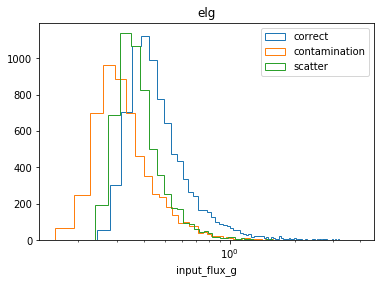

In [127]:
plt.hist(sim['input_flux_g'][correct],bins=100,label='correct',histtype='step')
plt.hist(sim['input_flux_g'][contamination],bins=100,label='contamination',histtype='step')
plt.hist(sim['input_flux_g'][scatter],bins=100,label='scatter',histtype='step')
plt.xlabel('input_flux_g')
plt.gca().set_xscale('log')
plt.title('elg')
plt.legend()

In [139]:
measured = np.array(1.15*rz_measured-0.15-gr_measured)
(measured>0).sum()

/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app


53203

/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in greater
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in greater
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:20: RuntimeWarning: invalid value encountered in greater
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:35: RuntimeWarning: invalid value encountered in greater
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:63: RuntimeWarning: divide by zero encountered in log10
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__

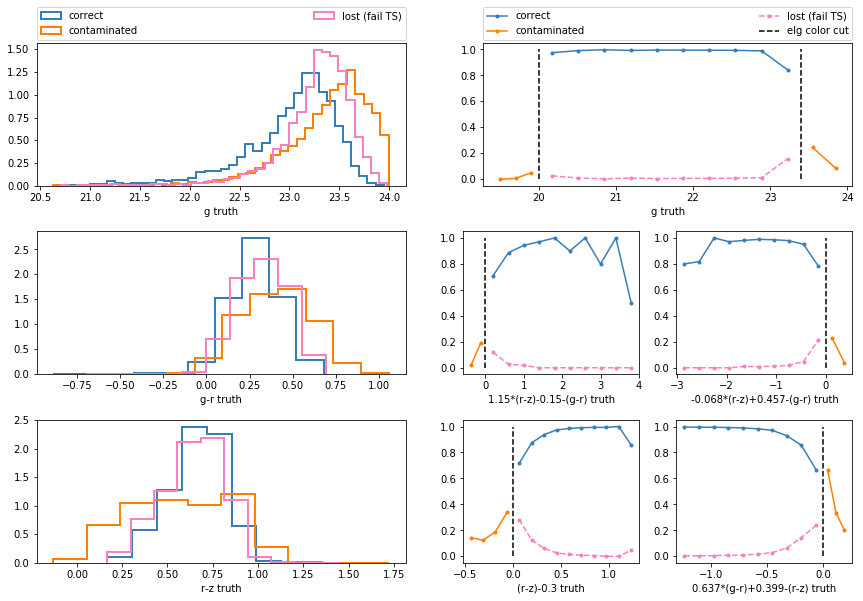

In [154]:
'''
Q:how's fracin affect elg selection? from the data, elgs are all over fracin=0.25
'''
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

plt.figure(figsize = (12,8))
plt.subplot(3,2,1)
g_truth = 22.5 - 2.5 * np.log10(sim['input_flux_g'] / sim['mw_transmission_g'])
r_truth = 22.5 - 2.5 * np.log10(sim['input_flux_r'] / sim['mw_transmission_r'])
z_truth = 22.5 - 2.5 * np.log10(sim['input_flux_z'] / sim['mw_transmission_z'])
gr_truth = g_truth - r_truth
rz_truth = r_truth - z_truth
elg_truth = elg_ture
elg_measured = elg_out

g_correct = g_truth[elg_truth&elg_measured&(g_truth>15)&sim['matched']]
g_contaminate = g_truth[(~elg_truth)&elg_measured&(g_truth>15)&sim['matched']]
g_lost_TS_fail = g_truth[elg_truth&(~elg_measured)&(g_truth>15)&sim['matched']]

lw=2
p1=plt.hist(g_correct,histtype='step',label = 'correct',color=CB_color_cycle[0],density=True,linewidth=lw,bins=40)
p2=plt.hist(g_contaminate,histtype='step',label = 'contaminated',color=CB_color_cycle[1],density=True,linewidth=lw,bins=40)
#p3=plt.hist(g_lost,histtype='step',label = 'lost (not recovered)',color=CB_color_cycle[2],density=True,linewidth=lw,bins=40)
p4=plt.hist(g_lost_TS_fail,histtype='step',label = 'lost (fail TS)',color=CB_color_cycle[3],density=True,linewidth=lw,bins=40)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)
plt.xlabel('g truth')

plt.subplot(3,2,3)
gr_correct = gr_truth[elg_truth&elg_measured]
gr_contaminate = gr_truth[(~elg_truth)&elg_measured]

gr_lost_TS_fail = gr_truth[elg_truth&(~elg_measured)&(gr_truth>-5)]


p1=plt.hist(gr_correct,histtype='step',label = 'correct',color=CB_color_cycle[0],density=True,linewidth=lw)
p2=plt.hist(gr_contaminate,histtype='step',label = 'contaminated',color=CB_color_cycle[1],density=True,linewidth=lw)

p4=plt.hist(gr_lost_TS_fail,histtype='step',label = 'lost (fail TS)',color=CB_color_cycle[3],density=True,linewidth=lw)

plt.xlabel('g-r truth')




plt.subplot(3,2,5)
rz_correct = rz_truth[elg_truth&elg_measured&sim['matched']]
rz_contaminate = rz_truth[(~elg_truth)&elg_measured&sim['matched']]

rz_lost_TS_fail = rz_truth[elg_truth&(~elg_measured)&sim['matched']]

p1=plt.hist(rz_correct,histtype='step',label = 'correct',color=CB_color_cycle[0],density=True,linewidth=lw)
p2=plt.hist(rz_contaminate,histtype='step',label = 'contaminated',color=CB_color_cycle[1],density=True,linewidth=lw)
#p3=plt.hist(rz_lost,histtype='step',label = 'lost (not recovered)',color=CB_color_cycle[2],density=True,linewidth=lw)
p4=plt.hist(rz_lost_TS_fail,histtype='step',label = 'lost (fail TS)',color=CB_color_cycle[3],density=True,linewidth=lw)
#p5 = plt.hist(rz_lost_fracin,histtype='step',label = 'lost (frac_in)')
plt.xlabel('r-z truth')


plt.subplot(3,2,2)
g_measured = 22.5 - 2.5 * np.log10(sim['flux_g'] / sim['mw_transmission_g'])
r_measured = 22.5 - 2.5 * np.log10(sim['flux_r'] / sim['mw_transmission_r'])
z_measured = 22.5 - 2.5 * np.log10(sim['flux_z'] / sim['mw_transmission_z'])
gr_measured = g_measured-r_measured
rz_measured = r_measured-z_measured
g_measured_elg = (g_measured>20)&(g_measured<23.4)
g_truth_elg = (g_truth>20.)&(g_truth<23.4)
bins=10
#sec #1
minium = 20.
maximun = 23.4
interval = (maximun-minium)/bins
g_truth_ratio_x = []
g_truth_ratio_y = []
for i in range(bins):
    sel_1 = (g_truth>minium+interval*i)&(g_truth<minium+interval*(i+1))&g_truth_elg
    sel_2 = sel_1&g_measured_elg
    g_truth_ratio_y.append(sel_2.sum()/sel_1.sum())
    g_truth_ratio_x.append(minium+interval*(i+0.5))
plt.plot(g_truth_ratio_x,g_truth_ratio_y,marker = '.',color = CB_color_cycle[0],label = 'correct')
max_ratio = np.array(g_truth_ratio_y).max()

#sec 2.1
minium =19.2

maximun = 20.
bins=4
interval = (maximun-minium)/bins
g_truth_contaminate_x = []
g_truth_contaminate_y = []
for i in range(bins):
    sel_1 = (g_truth>minium+interval*i)&(g_truth<minium+interval*(i+1))
    sel_2 = sel_1&g_measured_elg
    g_truth_contaminate_y.append(sel_2.sum()/sel_1.sum())
    g_truth_contaminate_x.append(minium+interval*(i+0.5))
plt.plot(g_truth_contaminate_x,g_truth_contaminate_y,marker = '.',color = CB_color_cycle[1],label = 'contaminated')

max_ratio = max(max_ratio,np.array(g_truth_contaminate_y).max())

#sec 2.2
minium = 23.4
maximun = 24
bins=2
interval = (maximun-minium)/bins
g_truth_contaminate2_x = []
g_truth_contaminate2_y = []
for i in range(bins):
    sel_1 = (g_truth>minium+interval*i)&(g_truth<minium+interval*(i+1))
    sel_2 = sel_1&g_measured_elg
    g_truth_contaminate2_y.append(sel_2.sum()/sel_1.sum())
    g_truth_contaminate2_x.append(minium+interval*(i+0.5))
plt.plot(g_truth_contaminate2_x,g_truth_contaminate2_y,marker = '.',color = CB_color_cycle[1])

max_ratio = max(max_ratio,np.array(g_truth_contaminate2_y).max())



#sec #4
minium = 20
maximun = 23.4
bins=10
interval = (maximun-minium)/bins
g_truth_TS_x = []
g_truth_TS_y = []
for i in range(bins):
    sel_1 = (g_truth>minium+interval*i)&(g_truth<minium+interval*(i+1))&g_truth_elg
    sel_2 = sel_1&(~g_measured_elg)
    g_truth_TS_y.append(sel_2.sum()/sel_1.sum())
    g_truth_TS_x.append(minium+interval*(i+0.5))
plt.plot(g_truth_TS_x,g_truth_TS_y,marker = '.',linestyle = '--',color = CB_color_cycle[3]\
         ,label = 'lost (fail TS)')
#max_ratio
max_ratio = max(max_ratio,np.array(g_truth_TS_y).max())



plt.xlabel('g truth')
#plt.ylabel('ratio')

#max_ratio
plt.plot([20]*2,[0,1],'k--',label = 'elg color cut')
plt.plot([23.4]*2,[0,1],'k--')

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)




def plot(minium,maximun,bins,measured,truth,truth_elg,measured_elg,color,label,linestyle):
    interval = (maximun-minium)/bins
    truth_ratio_x = []
    truth_ratio_y = []
    for i in range(bins):
        sel_1 = (truth>minium+interval*i)&(truth<minium+interval*(i+1))&truth_elg
        sel_2 = sel_1&measured_elg
        truth_ratio_y.append(sel_2.sum()/sel_1.sum())
        truth_ratio_x.append(minium+interval*(i+0.5))
    plt.plot(truth_ratio_x,truth_ratio_y,marker = '.',color = color,label = 'correct',linestyle=linestyle)
    max_ratio = np.array(g_truth_ratio_y).max()



plt.subplot(3,4,7)
'( 1.15*rz_truth-0.15-gr_truth>0) '
measured = np.array(1.15*rz_measured-0.15-gr_measured)
truth = np.array(1.15*rz_truth-0.15-gr_truth)
measured_elg = (measured>0)
truth_elg = (truth>0)
bins=10
#sec #1
minium = 0
maximun = 4
color = CB_color_cycle[0]#'#1f77b4'
label = 'correct'
linestyle = '-'
plot(minium,maximun,bins,measured,truth,truth_elg,measured_elg,color,label,linestyle)
#sec #2
measured = np.array(0.112*rz_measured+0.773-gr_measured)
truth = np.array(0.112*rz_truth+0.773-gr_truth)
measured_elg = (measured>0)
truth_non_elg = (truth<0)
bins=4
minium = -1
maximun = 0
color = CB_color_cycle[1]#'#ff7f0e'
label = 'contamination'
linestyle = '-'
plot(minium,maximun,bins,measured,truth,truth_non_elg,measured_elg,color,label,linestyle)

#sec #4
measured = np.array(0.112*rz_measured+0.773-gr_measured)
truth = np.array(0.112*rz_truth+0.773-gr_truth)
measured_non_elg = (measured<0)
truth_elg = (truth>0)
bins=10
minium = 0
maximun = 4
color = CB_color_cycle[3]##'#d62728'
label = 'lost (fail TS)'
linestyle = '--'
plot(minium,maximun,bins,measured,truth,truth_elg,measured_non_elg,color,label,linestyle)
plt.plot([0]*2,[0,1],'k--')

plt.xlabel('1.15*(r-z)-0.15-(g-r) truth')

#########################################################################################################
plt.subplot(3,4,8)
'(1.2*rz_truth+gr_truth-1.6<0)'

measured = np.array(1.2*rz_measured-1.6+gr_measured)
truth = np.array(1.2*rz_truth-1.6+gr_truth)
measured_elg = (measured<0)
truth_elg = (truth<0)
bins=10
truth_non_elg = (truth>0)
measured_non_elg = (measured>0)
#sec #1
minium = -3
maximun = 0
color = CB_color_cycle[0]#'#1f77b4'
label = 'correct'
linestyle = '-'
plot(minium,maximun,bins,measured,truth,truth_elg,measured_elg,color,label,linestyle)
#sec #2
bins=4
minium = 0
maximun = 1
color = CB_color_cycle[1]#'#ff7f0e'
label = 'contamination'
linestyle = '-'
plot(minium,maximun,bins,measured,truth,truth_non_elg,measured_elg,color,label,linestyle)

#sec #4
bins=10
minium = -3
maximun = 0
color = CB_color_cycle[3]#'#d62728'
label = 'lost (fail TS)'
linestyle = '--'
plot(minium,maximun,bins,measured,truth,truth_elg,measured_non_elg,color,label,linestyle)
plt.plot([0]*2,[0,1],'k--')


plt.xlabel('-0.068*(r-z)+0.457-(g-r) truth')

#########################################################################################################
plt.subplot(3,4,11)
'(rz_truth-0.3>0)'
measured = np.array(rz_measured-0.3)
truth = np.array(rz_truth-0.3)
measured_elg = (measured>0)
truth_elg = (truth>0)
bins=10
truth_non_elg = (truth<0)
measured_non_elg = (measured<0)
mmax=max(truth.max(),measured.max())
mmin=min(truth.min(),measured.min())
#sec #1
minium = 0
maximun = 1.3
color = CB_color_cycle[0]#'#1f77b4'
label = 'correct'
linestyle = '-'
plot(minium,maximun,bins,measured,truth,truth_elg,measured_elg,color,label,linestyle)
#sec #2
bins=4
minium = -0.5
maximun = 0
color = CB_color_cycle[1]#'#ff7f0e'
label = 'contamination'
linestyle = '-'
plot(minium,maximun,bins,measured,truth,truth_non_elg,measured_elg,color,label,linestyle)


#sec #4
bins=10
minium = 0
maximun = 1.3
color = CB_color_cycle[3]#'#d62728'
label = 'lost (fail TS)'
linestyle = '--'
plot(minium,maximun,bins,measured,truth,truth_elg,measured_non_elg,color,label,linestyle)
plt.plot([0]*2,[0,1],'k--')
plt.xlabel('(r-z)-0.3 truth')

#########################################################################################################
plt.subplot(3,4,12)
'(r-z)-1.6<0)'
measured = np.array(rz_measured-1.6)
truth = np.array(rz_truth-1.6)
measured_elg = (measured<0)
truth_elg = (truth<0)
bins=10
truth_non_elg = (truth>0)
measured_non_elg = (measured>0)
mmax=max(truth.max(),measured.max())
mmin=min(truth.min(),measured.min())
#sec #1
minium = -1.3
maximun = 0
color = CB_color_cycle[0]#'#1f77b4'
label = 'correct'
linestyle = '-'
plot(minium,maximun,bins,measured,truth,truth_elg,measured_elg,color,label,linestyle)
#sec #2
bins=4
minium = 0
maximun = 0.3
color = CB_color_cycle[1]#'#ff7f0e'
label = 'contamination'
linestyle = '-'
plot(minium,maximun,bins,measured,truth,truth_non_elg,measured_elg,color,label,linestyle)

#sec #4
bins=10
minium = -1.3
maximun = 0
color = CB_color_cycle[3]#'#d62728'
label = 'lost (fail TS)'
linestyle = '--'
plot(minium,maximun,bins,measured,truth,truth_elg,measured_non_elg,color,label,linestyle)
plt.plot([0]*2,[0,1],'k--')
plt.xlabel('(r-z) truth')

plt.tight_layout()

In [3]:
#fig 16 comes from WCS error, not obiwan pixel error, should I keep it?


#fig 15: I can show that the bias mostly come from tractor underestimates 
#flux in model galaxies, mainly because it does not converge to the same 
#model when do the fitting. (chi2>0 even if I give it a model with no noise)

#fig 14:could also come from unsuccessful fitting of model? don't have a 
#good enough explanation on it


#fig 13: only the 3rd plot. showing true r_half does not affect recovery rate


/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:22: RuntimeWarning: invalid value encountered in greater
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:22: RuntimeWarning: invalid value encountered in less
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in greater
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in less
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:57: RuntimeWarning: invalid value encountered in greater
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:5

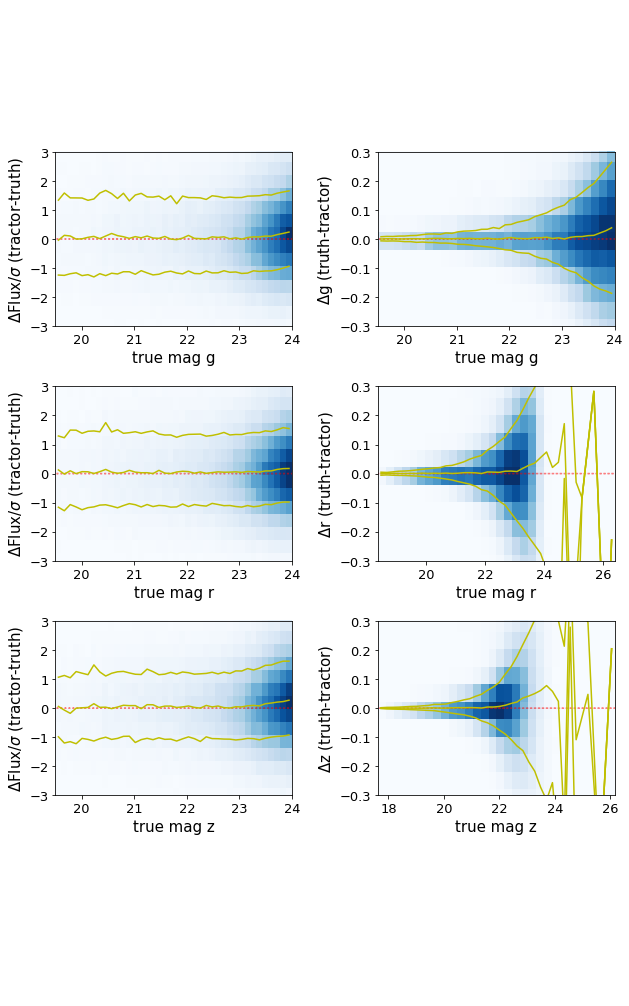

In [161]:
def get_percentile(y,x,bins,percen_num):#16,50,84
    minimum = x.min()
    maximum = x.max()
    interval = (maximum-minimum)/bins
    percent_list=[]
    mid_list = []
    for i in range(bins):
        left = minimum+i*interval
        right = minimum+(i+1)*interval
        mid = minimum+(i+0.5)*interval
        y_i = y[(x>left)&(x<=right)]
        if len(y_i)>0:
            output = np.percentile(y_i,percen_num)
            percent_list.append(output)
            mid_list.append(mid)
    return percent_list,mid_list



def one_subplot_flux(f_type,mag_truth):
    flux_diff = (sim['flux_'+f_type]-sim['input_flux_'+f_type])*np.sqrt(sim['flux_ivar_'+f_type])
    y = flux_diff[(flux_diff>-10)&(flux_diff<8)]
    x = mag_truth[(flux_diff>-10)&(flux_diff<8)]
    h,xe,ye,i = plt.hist2d(x,y,bins=40,cmap = 'Blues')
    plt.xlabel('true mag '+f_type)

    plt.plot(x,[0]*len(x),'r:',alpha=0.5)

    yl,xl = get_percentile(y,x,40,84)
    plt.plot(xl,yl,color = 'y')
    yl,xl = get_percentile(y,x,40,50)
    plt.plot(xl,yl,color = 'y')
    yl,xl = get_percentile(y,x,40,16)
    plt.plot(xl,yl,color = 'y')
    
    plt.gca().set_ylim((-3,3))

    plt.ylabel(r'$\Delta$'+'Flux/'+r'$\sigma$'+' (tractor-truth)')

matplotlib.rc('ytick', labelsize=13)
matplotlib.rc('xtick', labelsize=13)
plt.rcParams.update({'font.size': 15})

plt.figure(figsize=(9,10))    
plt.subplot(3,2,1)    
one_subplot_flux('g',g_truth)
plt.subplot(3,2,3)    
one_subplot_flux('r',g_truth)
plt.subplot(3,2,5)    
one_subplot_flux('z',g_truth)
plt.tight_layout()



def one_subplot_mag(f_type,mag_truth,mag_measure):
    mag_diff = mag_truth - mag_measure
    y = mag_diff[(mag_diff>-1)&(mag_diff<0.8)]
    x = mag_truth[(mag_diff>-1)&(mag_diff<0.8)]
    h,xe,ye,i = plt.hist2d(x,y,bins=30,cmap = 'Blues')
    plt.xlabel('true mag '+f_type)

    plt.plot(x,[0]*len(x),'r:',alpha=0.5)

    yl,xl = get_percentile(y,x,40,84)
    plt.plot(xl,yl,color = 'y')
    yl,xl = get_percentile(y,x,40,50)
    plt.plot(xl,yl,color = 'y')
    yl,xl = get_percentile(y,x,40,16)
    plt.plot(xl,yl,color = 'y')

    plt.ylabel(r'$\Delta$'+ f_type +' (truth-tractor)')
    
    plt.gca().set_ylim((-0.3,0.3))

plt.subplot(3,2,2)    
one_subplot_mag('g',g_truth,g_measured)
plt.subplot(3,2,4)    
one_subplot_mag('r',r_truth,r_measured)
plt.subplot(3,2,6)    
one_subplot_mag('z',z_truth,z_measured)

plt.tight_layout()


/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in greater
/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in less


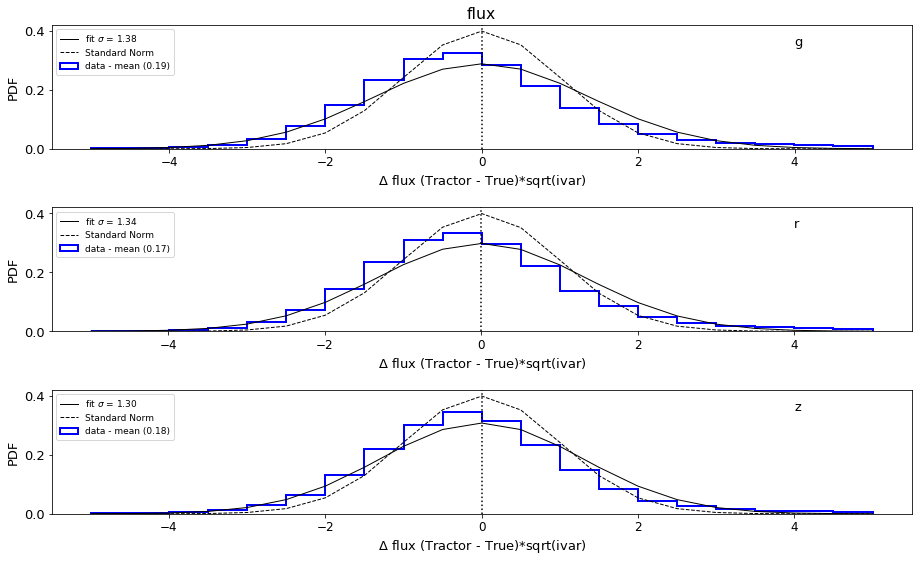

In [172]:
'''
mean is the mean of all pts between (-10,10), gaussian fitting is made between (-5,5) after mean correction
'''
matplotlib.rc('xtick', labelsize=12) 
plt.rcParams.update({'font.size': 13})
from scipy.stats import norm



g_measure = g_measured
r_measure = r_measured
z_measure = z_measured
plt.figure(figsize  = (13,8))  
def flux_plot(f_type):
    delta_flux = sim['flux_'+f_type] - sim['input_flux_'+f_type]
    ivar = sim['flux_ivar_'+f_type]
    delta_flux_plt = delta_flux*np.sqrt(ivar)
    delta_flux_plt = delta_flux_plt[(delta_flux_plt>-10)&(delta_flux_plt<10)]
    mean = delta_flux_plt.mean()
    delta_flux_plt_c = delta_flux_plt - mean
    delta_flux_plt_c = delta_flux_plt_c[(delta_flux_plt_c>-5)&(delta_flux_plt_c<5)]
     
    (mu, sigma) = norm.fit(delta_flux_plt_c)     
    n, bins, patches = plt.hist(delta_flux_plt_c,bins=20,histtype = 'step',density = True, \
                            linewidth=2,color='b',label = 'data - mean (%.2f)'%(mean+mu))
    d = mlab.normpdf( bins, 0, sigma)
    l = plt.plot(bins, d, 'k-', linewidth=1,label = 'fit '+r'$\sigma$ = %.2f'%sigma)
    d = mlab.normpdf( bins, 0, 1)
    l = plt.plot(bins, d, 'k--', linewidth=1,label = 'Standard Norm')
    plt.plot([0]*2,[0,0.42],'k:')
    plt.gca().set_ylim((0,0.42))
    plt.text(4,0.35,f_type)
    plt.xlabel(r'$\Delta$ flux (Tractor - True)*sqrt(ivar)')
    plt.legend(loc = 'upper left', prop={'size': 9})
    plt.ylabel('PDF')
    
  
plt.subplot(3,1,1)
plt.title('flux')
flux_plot('g')
plt.subplot(3,1,2)
flux_plot('r')
plt.subplot(3,1,3)
flux_plot('z')
plt.tight_layout()


                         